In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.cluster import KMeans  

In [2]:
df = pd.read_csv('air.csv')
df1 = df.drop(['Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type', 'Registration', 'cn/In'],1)

In [3]:
def remove_punctuation(s):
    exclude = set(string.punctuation)
    s = ''.join([i for i in s if i not in exclude])
    return s

#t = df1['Summary'].dropna()
#book = t.str.lower().apply(remove_punctuation).str.split().values
df1['Text'] = df1['Summary'].map(lambda x: remove_punctuation(str(x).lower()))

In [4]:
stop = stopwords.words('english')
stop.append('plane')
stop.append('crashed')
stop.append('aircraft')

In [58]:
tfidf_vectorizer = TfidfVectorizer(min_df=20, stop_words=stop, ngram_range=(1,2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['Text']) 

word = tfidf_vectorizer.get_feature_names()
weight = tfidf_matrix.toarray()

tfidf_matrix.shape

(5268, 863)

In [59]:
clf = KMeans(n_clusters=6)  
s = clf.fit(weight)  
print(s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [60]:
centers = clf.cluster_centers_
clf.labels_

array([5, 5, 5, ..., 5, 2, 1])

In [61]:
top = pd.DataFrame(centers.T)
top['Name'] = word

for i in range(6):
    top_1 = top.sort_values(i,ascending=False).iloc[:20, :]
    a = ', '.join(top_1['Name']).title()
    print(str(a))
    print(' ')

Mountain, Weather, Conditions, Weather Conditions, Poor, Poor Weather, Flight, Vfr, Adverse Weather, Adverse, Struck, Vfr Flight, Struck Mountain, Flew, Ft, Continued, Flight Adverse, Continued Vfr, Pilot, Flew Mountain
 
En Route, En, Route, Mountain En, Disappeared En, Disappeared, Mountain, Cargo, Found, Mountains, Wreckage, Mt, Weather, Flight, Sea, Poor, Never, Terrain, Struck, Missing
 
Approach, Runway, Land, Attempting, Attempting Land, Short, Short Runway, Landing, Airport, Pilot, Crew, Fog, Cargo, Struck, Ground, Final, Trees, Heavy, Rain, Final Approach
 
Shot, Rebels, Missile, Fire, Military, Forces, Surfacetoair, Fighter, Helicopter, North, Land, Cargo, Taking, Shortly, Sea, Possibly, Air, Takeoff, Flames, Minutes
 
Nan, Failure, Conditions, Attempting, Shortly, Flight, Altitude, Left, En Route, Two, Sea, Poor Weather, Low, Hit, Poor, Heavy, Accident, Vfr Flight, Field, Turbulence
 
Engine, Takeoff, Taking, Failure, Flight, Landing, Pilot, Shortly, Cargo, Fire, Control, Se

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(weight)   #载入N维

In [65]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(weight)
tsne = pd.DataFrame(tsne.embedding_)


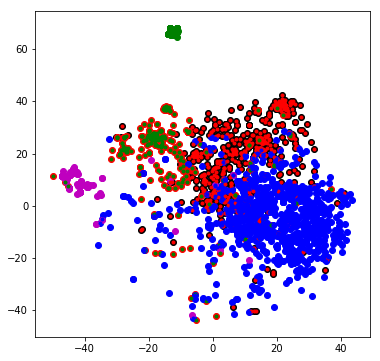

In [66]:
fig = plt.figure(figsize=(6,6))

d = tsne[pl['Class'] == 0]
plt.plot(d[0],d[1], 'r.')
d = tsne[pl['Class'] == 1]
plt.plot(d[0],d[1], 'g.')
d = tsne[pl['Class'] == 2]
plt.plot(d[0],d[1], 'b.')

color = ['k', 'r', 'b', 'm', 'g', 'y', 'c']

z1 = tsne[pl['Class']==0]
plt.scatter(z1[0], z1[1], color=color[0]) 
z1 = tsne[pl['Class']==1]
plt.scatter(z1[0], z1[1], color=color[1]) 
z1 = tsne[pl['Class']==2]
plt.scatter(z1[0], z1[1], color=color[2]) 
z1 = tsne[pl['Class']==3]
plt.scatter(z1[0], z1[1], color=color[3]) 
z1 = tsne[pl['Class']==4]
plt.scatter(z1[0], z1[1], color=color[4])

In [64]:
df1['Class'] = clf.labels_
df1['Accidents'] = 1
for i in range(6):
    print(str(i))
    print(df1[df1['Class']==i]['Accidents'].sum())
    print(df1[df1['Class']==i]['Fatalities'].sum())

0
582
9234.0
1
302
4884.0
2
915
21303.0
3
117
3555.0
4
390
2977.0
5
2962
63526.0
